# Enhancements in Spatial Domain

## Basics: Importing image

In [ ]:
# Importing libraries
import numpy as np #for array operations
import matplotlib.pyplot as plt #for ploting the image
import cv2 #for operations
import matplotlib.image as mpimg

In [2]:
#Simple numpy array
img= np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

print(img)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


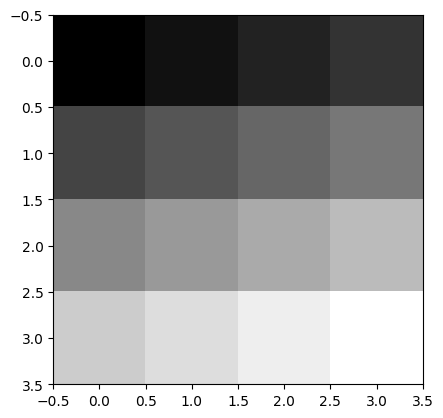

In [ ]:
# Converting array to image
plt.imshow(img, cmap='gray')
plt.show()

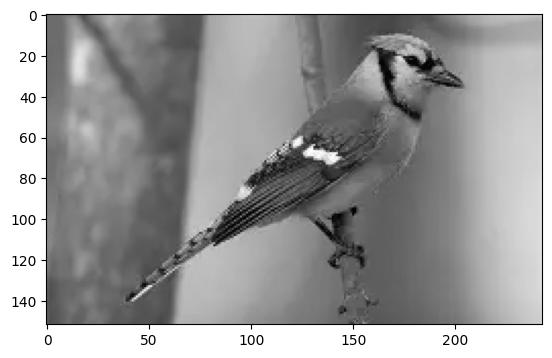

[[108 108 108 ... 195 197 201]
 [108 108 108 ... 190 191 196]
 [108 108 108 ... 180 182 186]
 ...
 [ 90  84  79 ... 204 206 211]
 [ 90  84  79 ... 205 206 211]
 [ 90  84  79 ... 205 206 209]]


In [ ]:
#Importing and conversion to grayscale of an image using cv2 and matplotlib
img = cv2.cvtColor(cv2.imread("img.webp"), cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()
print(img)

In [ ]:
# Image analysis

# Image size (shape)
print("Image Shape (H, W, C):", img.shape,"\n")   # e.g., (512, 512, 3)

# Total size in pixels
height, width = img.shape[0], img.shape[1]
print("Width:", width, " Height:", height,"\n")

num_pixels= height* width
print("Number of pixels:", num_pixels,"\n")

# If RGB
if img.ndim == 3:
    print("Number of channels:", img.shape[2],"\n")

# Data type of pixels
print("Data type:", img.dtype,"\n")

# Bit depth
bit_depth = img.dtype.itemsize * 8   # bytes * 8 = bits
print("Bit depth per channel:", bit_depth, "bits","\n")


Image Shape (H, W, C): (152, 243) 

Width: 243  Height: 152 

Number of pixels: 36936 

Data type: uint8 

Bit depth per channel: 8 bits 



## Ploting histogram for an image

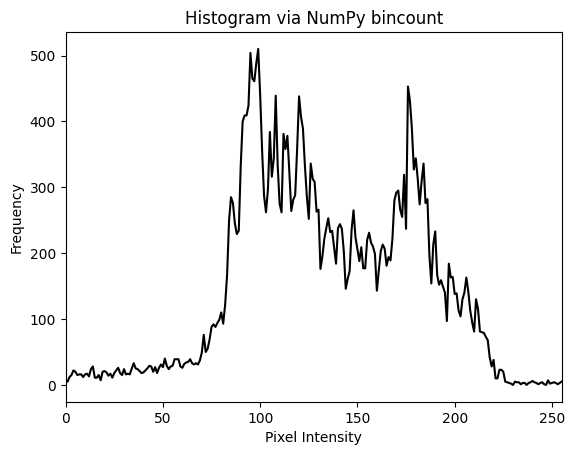

In [13]:
hist = np.bincount(img.ravel(), minlength=256)

plt.plot(hist, color='black')
plt.title("Histogram via NumPy bincount")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.show()

## Point Processing techniques

### Image Negaton

[[147 147 147 ...  60  58  54]
 [147 147 147 ...  65  64  59]
 [147 147 147 ...  75  73  69]
 ...
 [165 171 176 ...  51  49  44]
 [165 171 176 ...  50  49  44]
 [165 171 176 ...  50  49  46]]


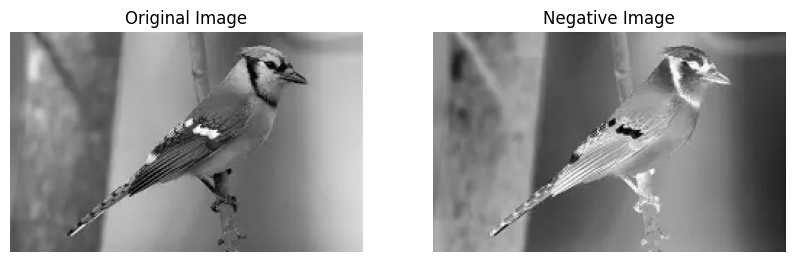

In [15]:
imgn = 255 - img
print(imgn)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imgn, cmap='gray')
plt.title("Negative Image")
plt.axis("off")
plt.show()

### Log transformation

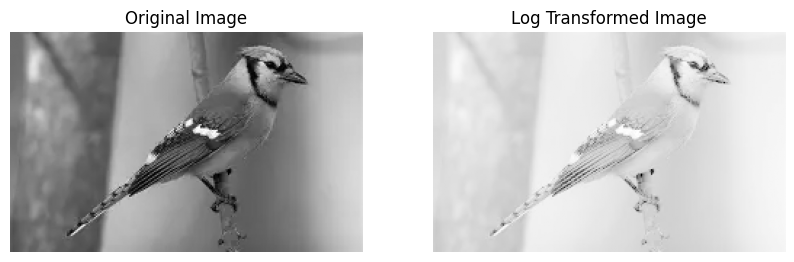

In [16]:
c = 255 / np.log1p(np.max(img))
img_log = c * np.log1p(img)
img_log = np.array(img_log, dtype=np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_log, cmap='gray')
plt.title("Log Transformed Image")
plt.axis("off")
plt.show()

### Contrast Stretching

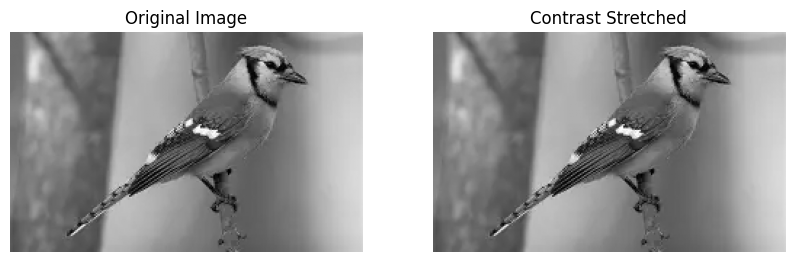

In [17]:
r_min, r_max = np.min(img), np.max(img)

stretched = ((img - r_min) / (r_max - r_min)) * 255
stretched = np.clip(stretched, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(stretched, cmap='gray')
plt.title("Contrast Stretched")
plt.axis("off")
plt.show()


### Thresholding

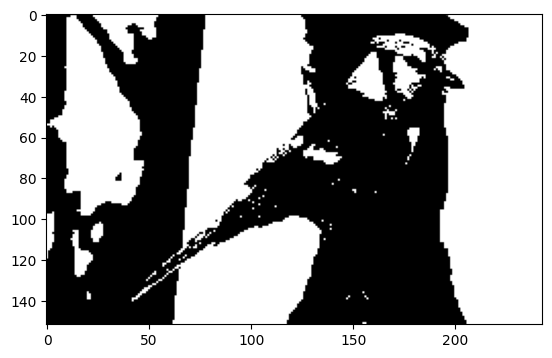

In [18]:
thresholded = np.where(img > 128, 255, 0)
plt.imshow(thresholded, cmap='gray')
plt.show()

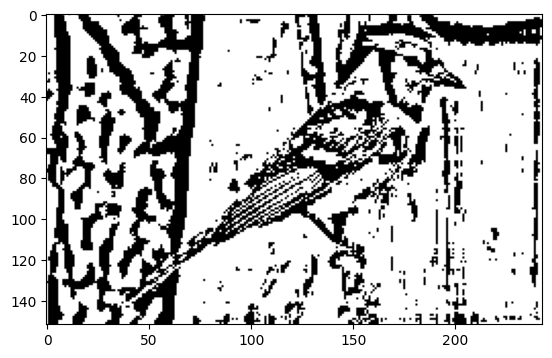

In [19]:
adaptive_mean = cv2.adaptiveThreshold(img, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY,
                                      11, 2)
plt.imshow(adaptive_mean, cmap='gray')
plt.show()

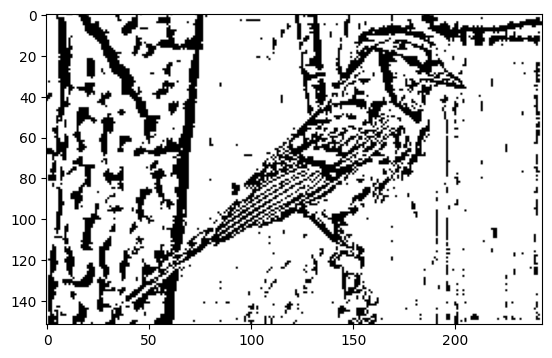

In [20]:
adaptive_gaussian = cv2.adaptiveThreshold(img, 255,
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY,
                                          11, 2)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.show()

### Histogram Equalisation

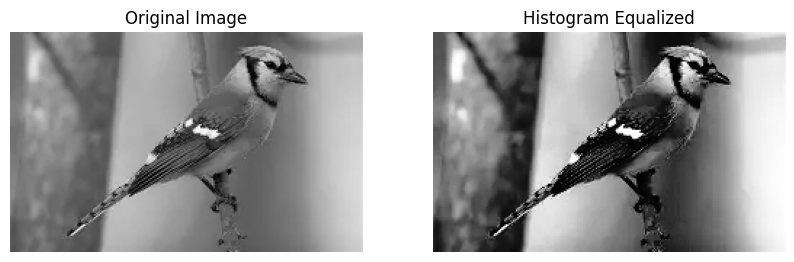

In [21]:
equalized = cv2.equalizeHist(img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")
plt.show()

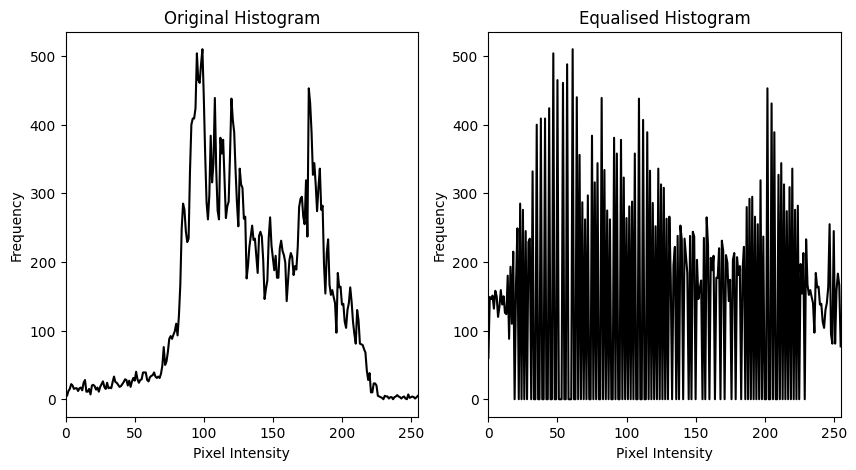

In [24]:
histE = np.bincount(equalized.ravel(), minlength=256)
hist = np.bincount(img.ravel(), minlength=256)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist, color='black')
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])

plt.subplot(1, 2, 2)
plt.plot(histE, color='black')
plt.title("Equalised Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.show()

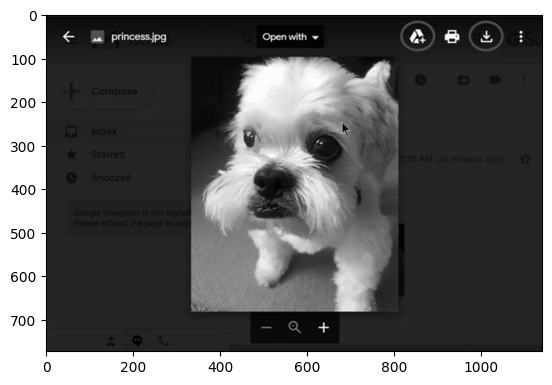

[[108 108 108 ... 195 197 201]
 [108 108 108 ... 190 191 196]
 [108 108 108 ... 180 182 186]
 ...
 [ 90  84  79 ... 204 206 211]
 [ 90  84  79 ... 205 206 211]
 [ 90  84  79 ... 205 206 209]]


In [27]:
img2 = cv2.cvtColor(cv2.imread("img2.png"), cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap='gray')
plt.show()
print(img)

In [28]:
# Image size (shape)
print("Image Shape (H, W, C):", img2.shape,"\n")   # e.g., (512, 512, 3)

# Total size in pixels
height, width = img2.shape[0], img2.shape[1]
print("Width:", width, " Height:", height,"\n")

num_pixels= height* width
print("Number of pixels:", num_pixels,"\n")

# If RGB
if img.ndim == 3:
    print("Number of channels:", img2.shape[2],"\n")

# Data type of pixels
print("Data type:", img2.dtype,"\n")

# Bit depth
bit_depth = img2.dtype.itemsize * 8   # bytes * 8 = bits
print("Bit depth per channel:", bit_depth, "bits","\n")


Image Shape (H, W, C): (773, 1140) 

Width: 1140  Height: 773 

Number of pixels: 881220 

Data type: uint8 

Bit depth per channel: 8 bits 



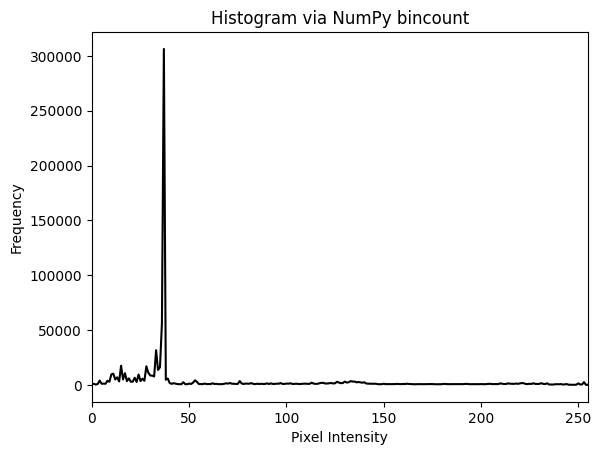

In [29]:
hist = np.bincount(img2.ravel(), minlength=256)

plt.plot(hist, color='black')
plt.title("Histogram via NumPy bincount")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.show()

[[202 202 202 ... 202 202 202]
 [202 202 202 ... 202 202 202]
 [201 201 201 ... 201 201 201]
 ...
 [218 218 218 ... 227 227 227]
 [218 218 218 ... 227 227 227]
 [218 218 218 ... 227 227 227]]


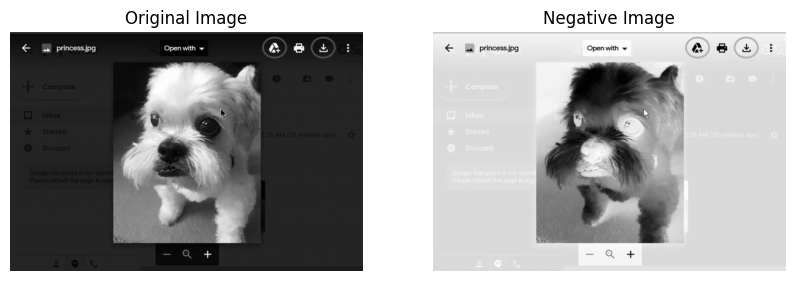

In [31]:
img2n = 255 - img2
print(img2n)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2n, cmap='gray')
plt.title("Negative Image")
plt.axis("off")
plt.show()

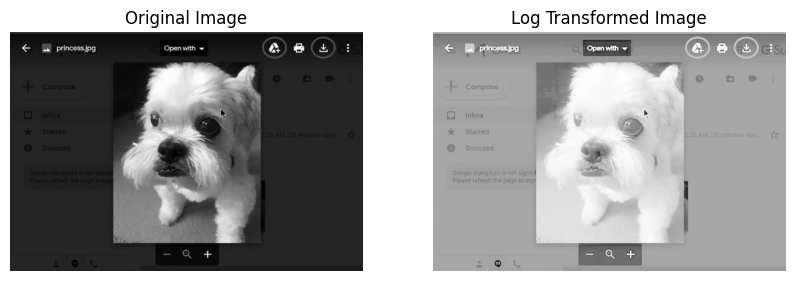

In [33]:
c = 255 / np.log1p(np.max(img2))
img2_log = c * np.log1p(img2)
img2_log = np.array(img2_log, dtype=np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2_log, cmap='gray')
plt.title("Log Transformed Image")
plt.axis("off")
plt.show()

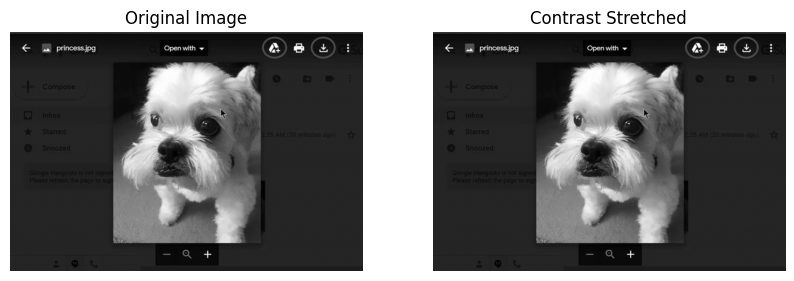

In [34]:
r_min, r_max = np.min(img), np.max(img)

stretched2 = ((img2 - r_min) / (r_max - r_min)) * 255
stretched2 = np.clip(stretched2, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(stretched2, cmap='gray')
plt.title("Contrast Stretched")
plt.axis("off")
plt.show()


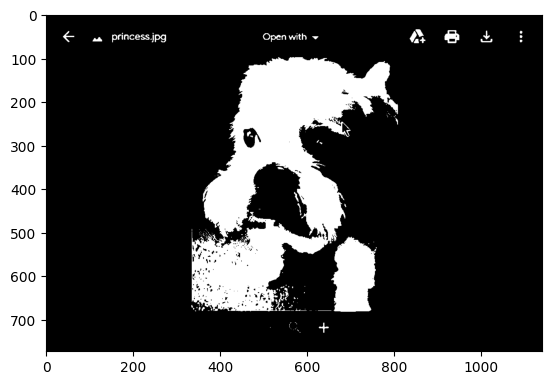

In [35]:
thresholded2 = np.where(img2 > 128, 255, 0)
plt.imshow(thresholded2, cmap='gray')
plt.show()

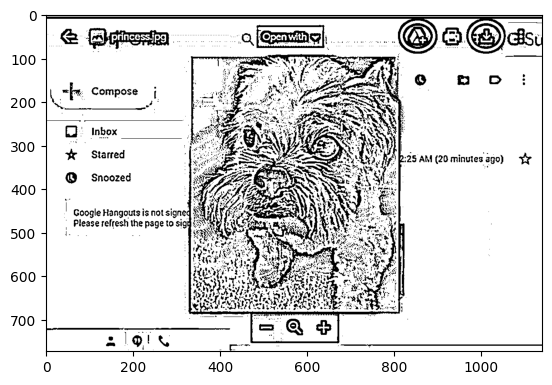

In [36]:
adaptive_mean2 = cv2.adaptiveThreshold(img2, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY,
                                      11, 2)
plt.imshow(adaptive_mean2, cmap='gray')
plt.show()

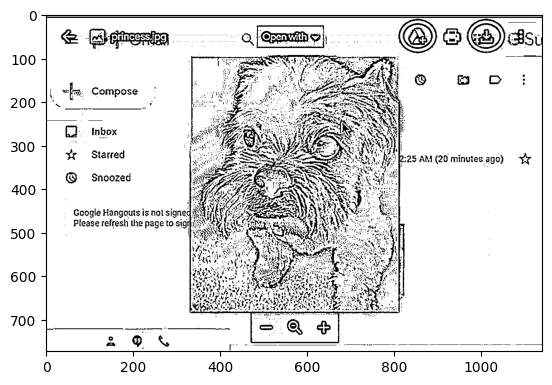

In [37]:
adaptive_gaussian2 = cv2.adaptiveThreshold(img2, 255,
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY,
                                          11, 2)
plt.imshow(adaptive_gaussian2, cmap='gray')
plt.show()

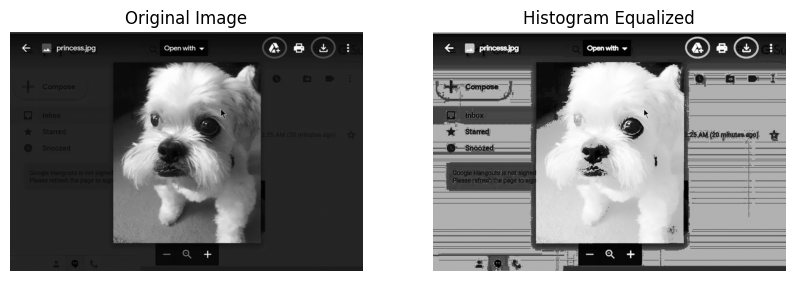

In [38]:
equalized2 = cv2.equalizeHist(img2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized2, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")
plt.show()

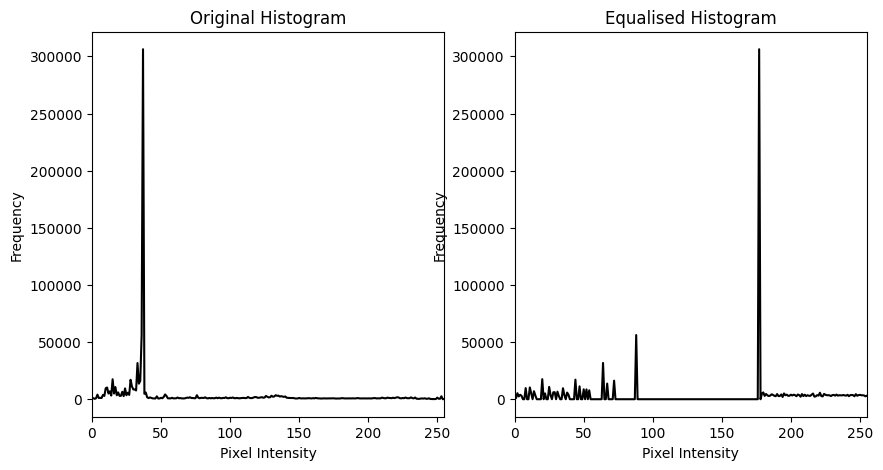

In [39]:
histE2 = np.bincount(equalized2.ravel(), minlength=256)
hist2 = np.bincount(img2.ravel(), minlength=256)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist2, color='black')
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])

plt.subplot(1, 2, 2)
plt.plot(histE2, color='black')
plt.title("Equalised Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.show()

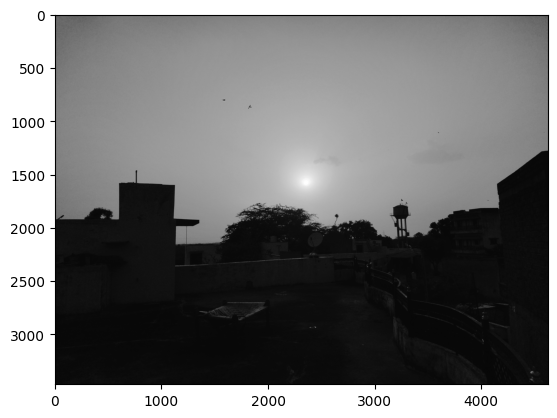

[[114 113 122 ... 112 113 114]
 [113 112 117 ... 118 113 108]
 [113 114 114 ... 119 113 107]
 ...
 [ 46  46  45 ...  47  48  48]
 [ 45  46  46 ...  47  48  49]
 [ 45  46  46 ...  48  48  48]]


In [42]:
img3 = cv2.cvtColor(cv2.imread("img3.jpg"), cv2.COLOR_BGR2GRAY)
plt.imshow(img3, cmap='gray')
plt.show()
print(img3)

In [43]:
# Image size (shape)
print("Image Shape (H, W, C):", img3.shape,"\n")   # e.g., (512, 512, 3)

# Total size in pixels
height, width = img3.shape[0], img2.shape[1]
print("Width:", width, " Height:", height,"\n")

num_pixels= height* width
print("Number of pixels:", num_pixels,"\n")

# If RGB
if img3.ndim == 3:
    print("Number of channels:", img3.shape[2],"\n")

# Data type of pixels
print("Data type:", img3.dtype,"\n")

# Bit depth
bit_depth = img3.dtype.itemsize * 8   # bytes * 8 = bits
print("Bit depth per channel:", bit_depth, "bits","\n")


Image Shape (H, W, C): (3468, 4624) 

Width: 1140  Height: 3468 

Number of pixels: 3953520 

Data type: uint8 

Bit depth per channel: 8 bits 



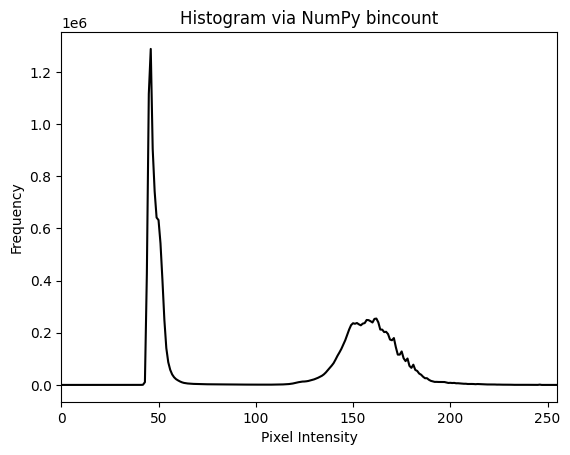

In [44]:
hist3 = np.bincount(img3.ravel(), minlength=256)

plt.plot(hist3, color='black')
plt.title("Histogram via NumPy bincount")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.show()

[[141 142 133 ... 143 142 141]
 [142 143 138 ... 137 142 147]
 [142 141 141 ... 136 142 148]
 ...
 [209 209 210 ... 208 207 207]
 [210 209 209 ... 208 207 206]
 [210 209 209 ... 207 207 207]]


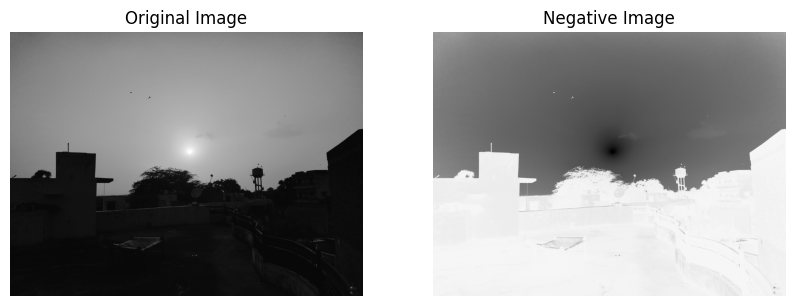

In [47]:
img3n = 255 - img3
print(img3n)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img3n, cmap='gray')
plt.title("Negative Image")
plt.axis("off")
plt.show()

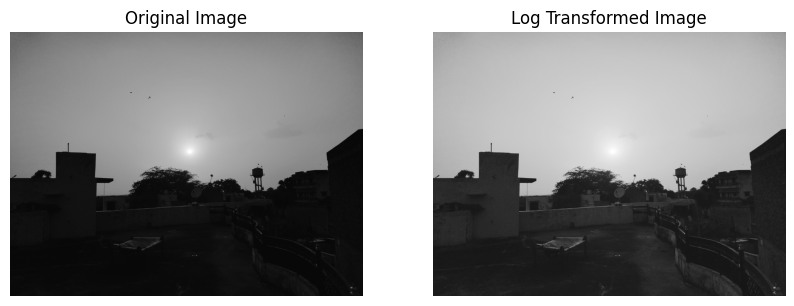

In [48]:
c = 255 / np.log1p(np.max(img3))
img3_log = c * np.log1p(img3)
img2_log = np.array(img3_log, dtype=np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img3_log, cmap='gray')
plt.title("Log Transformed Image")
plt.axis("off")
plt.show()

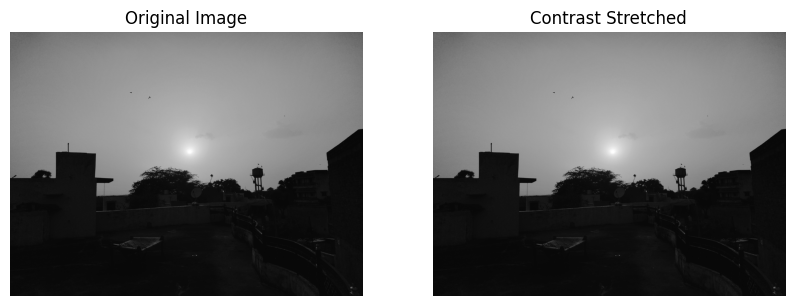

In [49]:
r_min, r_max = np.min(img), np.max(img)

stretched3 = ((img3 - r_min) / (r_max - r_min)) * 255
stretched3 = np.clip(stretched3, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(stretched3, cmap='gray')
plt.title("Contrast Stretched")
plt.axis("off")
plt.show()


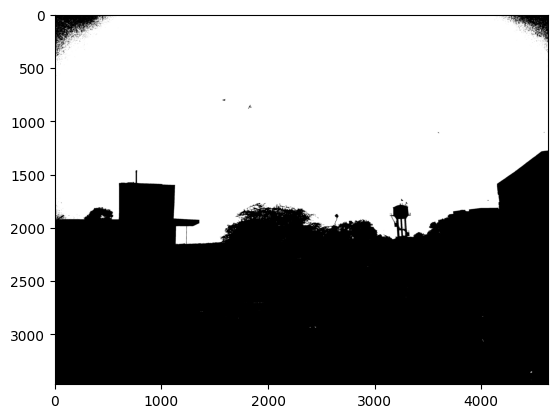

In [50]:
thresholded3 = np.where(img3 > 128, 255, 0)
plt.imshow(thresholded3, cmap='gray')
plt.show()

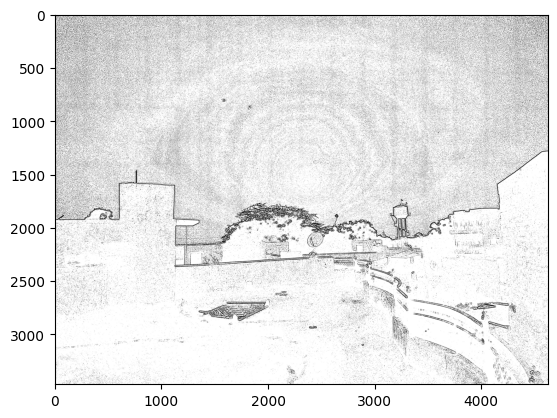

In [52]:
adaptive_mean3 = cv2.adaptiveThreshold(img3, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY,
                                      11, 2)
plt.imshow(adaptive_mean3, cmap='gray')
plt.show()

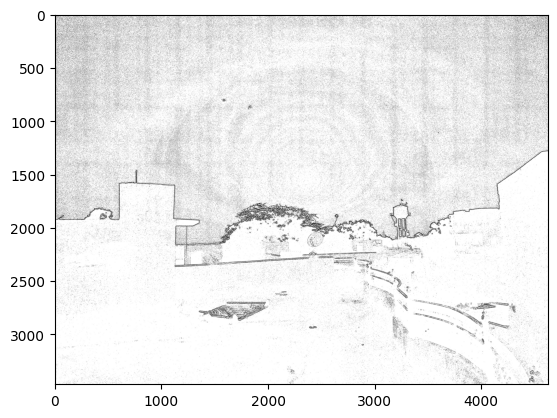

In [56]:
adaptive_gaussian3 = cv2.adaptiveThreshold(img3, 255,
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY,
                                          11, 2)
plt.imshow(adaptive_gaussian3, cmap='gray')
plt.show()

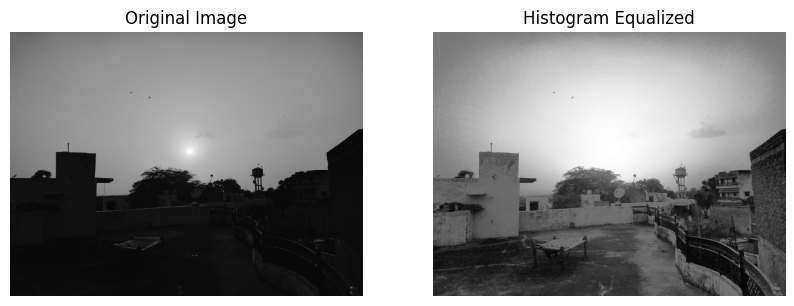

In [54]:
equalized3 = cv2.equalizeHist(img3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized3, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")
plt.show()

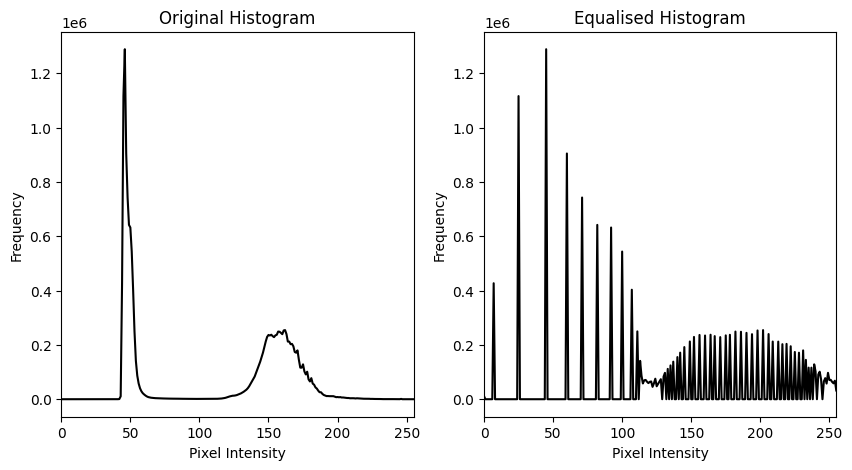

In [57]:
histE3 = np.bincount(equalized3.ravel(), minlength=256)
hist3 = np.bincount(img3.ravel(), minlength=256)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist3, color='black')
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])

plt.subplot(1, 2, 2)
plt.plot(histE3, color='black')
plt.title("Equalised Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.show()